# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
%%script bash
cd .. && mkdir build
cd build/ && rm -rf *
cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
make install

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found PythonInterp: /home/orga2/anaconda3/envs/metodos/bin/python (found version "3.7.9") 
-- Found PythonLibs: /home/orga2/anaconda3/envs/metodos/lib/libpython3.7m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
-- Configuring done
-- Generating done
-- Build files have been written to: /home/orga2/Materias/MetNum/metodos-numericos-grupo-4/tp2/build
Scanning dependencies of target tp2
[ 10%] Building CXX object CMakeFiles/tp2.dir/src/

mkdir: cannot create directory ‘build’: File exists
Release mode
CMAKE_INSTALL_PREFIX=/home/orga2/Materias/MetNum/metodos-numericos-grupo-4/tp2


In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/orga2/Materias/MetNum/metodos-numericos-grupo-4/tp2/notebooks
Python 3.7.9


## Explorando los datos

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/emnist-letters-train.csv")
df_train[:10]

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Es un csv, con columnas por cada pixel

In [4]:
df_train_reduced = df_train

Manera de dividir el data set

In [5]:
# Uso values para mandar todo a arrays de numpy
X = df_train_reduced[df_train_reduced.columns[1:]].values
y = df_train_reduced["23"].values.reshape(-1, 1)

X.shape, y.shape

((88799, 784), (88799, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 15


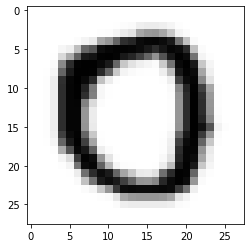

In [6]:
import matplotlib.pyplot as plt

num = 2

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [7]:
df_train_reduced["23"].value_counts(normalize=True)

25    0.038886
11    0.038717
24    0.038705
5     0.038705
20    0.038694
17    0.038683
16    0.038627
9     0.038604
26    0.038593
8     0.038559
22    0.038536
23    0.038536
3     0.038503
21    0.038503
18    0.038503
12    0.038458
15    0.038379
13    0.038311
10    0.038311
4     0.038266
2     0.038244
1     0.038244
6     0.038221
19    0.038199
7     0.038120
14    0.037895
Name: 23, dtype: float64

In [8]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 71039 instancias de entrenamiento y 17760 de validación


No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

In [9]:
from KFoldXValidation import KfoldXvalidation
from tqdm import tqdm
import metnum
from sklearn.metrics import accuracy_score

In [10]:
%%time
clf = metnum.KNNClassifier(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

CPU times: user 14min 29s, sys: 2.1 s, total: 14min 31s
Wall time: 14min 27s


In [11]:
print(accuracy_score(y_pred, y_val))

0.847240990990991
